# Image Distortion
If $\theta_0$ is a point within an image, corresponding to the point $\beta_0=\beta(\theta_0)$ within the source, then

$ I(\boldsymbol{\theta})= I^{(s)} [\boldsymbol{\beta}_0 +\mathcal{A}(\boldsymbol{\theta}_0).(\boldsymbol{\theta}-\boldsymbol{\theta}_0)]$

In order to map from the source to the image plane, we need to use the magnifcation tensor, whcih is defiend as the inverse of the Jacobian:

$\mathcal{M} = \mathcal{A}^{-1}$

Inverting $\mathcal{A} $ we obtain:

$\mathcal{M} = \dfrac{1}{\mathrm{det}(\mathcal{A})} \mathrm{adj}(\mathcal{A})   $

$= \dfrac{1}{(1-\kappa-\gamma_1)(1-\kappa+\gamma_1) - \gamma_2^2} 
\left( \begin{array}{cc}
 1 - \kappa + \gamma_1     & \gamma_2 \\
   \gamma_2       & 1-\kappa-\gamma_1     
\end{array}\right) $

$=\dfrac{1}{(1-\kappa)^2 - |\gamma|^2} \left( \begin{array}{cc}
 1 - \kappa + \gamma_1     & \gamma_2 \\
   \gamma_2       & 1-\kappa-\gamma_1     
\end{array}\right) $

Magnification is defined as the determinant of the magnification tensor:

$\mu   = \mathrm{det}\cal{M} = \dfrac{1}{\mathrm{det}(\mathcal{A})} =\dfrac{1}{(1-\kappa)^2 - |\gamma|^2}$

so we can write the magnification tensor as

$\cal{M} =\mu \left( \begin{array}{cc}
 1 - \kappa + \gamma_1     & \gamma_2 \\
   \gamma_2       & 1-\kappa-\gamma_1     
\end{array}\right) $

Eigenvalues of shear matrix are $1-\kappa-|\gamma|$ and $1-\kappa+|\gamma|$

These define the major and minor radii of an ellipse:

$a= \dfrac{1}{1-\kappa+|\gamma|}$

$b= \dfrac{1}{1-\kappa-|\gamma|}$

$ \gamma = \gamma_1 + i\gamma_2 = |\gamma|e^{2i\phi}$

with $\phi$ being the polar angle between the two shear components.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.text as text
import numpy as np
from ipywidgets import *
from IPython.display import display

%matplotlib inline

## Plot distortion of circle for varying shear and convergence components

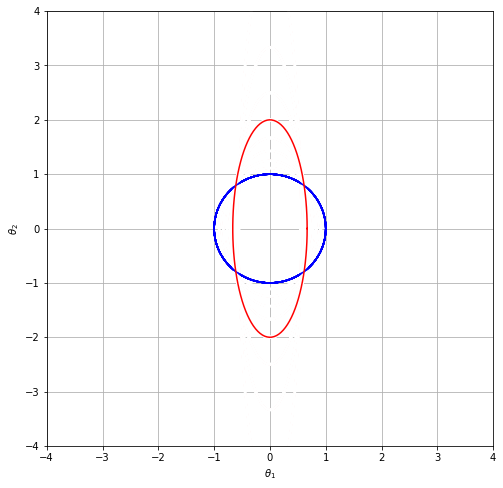

In [7]:
#define circle in cartesian co-ordinates, which will be transformed by shear matrix
r=1
theta = np.linspace(0, 2*np.pi, 100)
x = r * np.cos(theta)
y = r * np.sin(theta)

# Global variables to hold transformed co-ordinates
u = 0.0
v = 0.0

fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
ax.grid(True)
ax.plot(x,y)

phiText = FloatText(description=r'$\phi$')
display(phiText)
aText = FloatText(description='a')
display(aText)
bText = FloatText(description='b')
display(bText)

def plot_shear(gamma1, gamma2, kappa):
    global u # need to use global variables to track previous values
    global v
    ax.plot (u,v, color='w' ,lw=3) # use this to blit previous image
  
    gamma = np.sqrt(gamma1**2 + gamma2**2)
    
    if gamma==0: # we want to avoid a divide by zero error
            aText.value= 0
            bText.value= 0 
            phiText.value =  0
            return 
        
    # calculate magnification from determinant of Jacobian matrix
    mu = 1/((kappa-1)**2 - gamma**2)
        
    # apply shears from components of magnification matrix    
    u = x * mu * (1 - kappa + gamma1) + y * gamma2
    v = y * mu * (1 - kappa - gamma1) + x * gamma2 

    # calculate ellipse parameters from matrix elements
    a = r / (1 - kappa + gamma)
    b = r / (1 - kappa - gamma)
    phi = 0.5 * np.arccos((gamma1)/gamma) * np.sign(gamma2)

    aText.value='{:1.2f}'.format(a) 
    bText.value='{:1.2f}'.format(b) 
    phiText.value=  '{:1.1f}'.format(phi/np.pi*180)
    
    ax.plot(x,y, color='b')
    ax.plot(u,v, color='r' )
    display(fig)
    
interact(plot_shear, gamma1=(-0.8,0.81,0.1),gamma2=(-0.8,0.81,0.1), kappa=(-0.8,0.81,0.1));


# Plot distortion of circle in gamma space

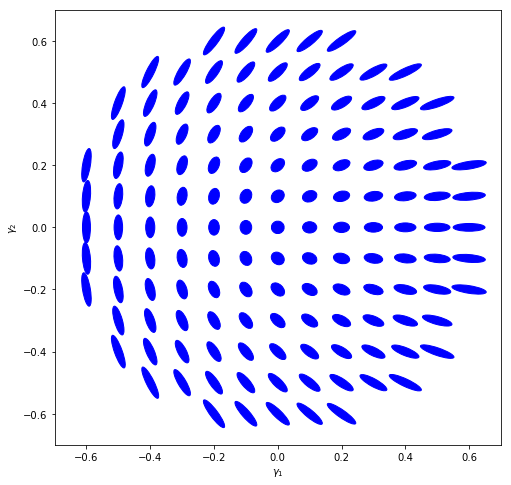

In [4]:
x = np.arange(-0.7, 0.71, 0.1)
y = np.arange(-0.7, 0.71, 0.1)

fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.set_xlim(-0.7, 0.7)
ax.set_ylim(-0.7, 0.7)
ax.set_xlabel(r'$\gamma_1$')
ax.set_ylabel(r'$\gamma_2$')

def draw_ellipse(gamma1, gamma2, kappa):
    r=0.02  

    gamma = np.sqrt(gamma1**2+gamma2**2)
    mu = 1/((kappa-1)**2 - gamma**2)
    
    phi = 0.5 * np.arccos((gamma1)/gamma) * np.sign(gamma2)  #not sure why sign(gamma2) needed to make this work
   
    a = r/(1 - kappa + gamma)
    b = r/(1 - kappa - gamma)

    if (gamma<0.65):
        ax.add_patch(patches.Ellipse(xy=(gamma1, gamma2), width=b*2, height=a*2, angle=phi/np.pi*180,color='b',fill=True))   
        
for u in x:
    for v in y:
        draw_ellipse(u,v,0);
        
plt.show()